In [1]:
import pandas as pd
import torch
import numpy as np
import networkx as nx
import warnings
warnings.filterwarnings('ignore')
import csv
import random
import os
from littleballoffur import ForestFireSampler
import matplotlib.pyplot as plt
import time

Load Dataset

In [2]:
df_nodes = pd.read_table(('node_pubmed.dat'),names=['node_id', 'node_name', 'node_type', 'node_attributes'],quoting=csv.QUOTE_NONE)
df_nodes

,node_id,node_name,node_type,node_attributes
0,0,ITCC,2,"0.02508,-0.036716,0.091492,-0.074665,0.022286,..."
1,1,gamma-Butyrolactone,2,"-0.072251,-0.1242,0.027377,-0.049692,0.022852,..."
2,2,eIF4E,0,"-0.85981,-1.632455,-0.238721,-0.527147,1.09448..."
3,3,abietane,2,"-0.100137,-0.295236,0.204746,-0.043928,0.09525..."
4,4,DOGMATISM,2,"0.005788,-0.080936,-0.038131,0.039531,-0.00082..."
...,...,...,...,...
63104,63104,archival_tumor,1,"0.066291,0.020142,0.146529,-0.058354,0.11038,0..."
63105,63105,diflucortolone,2,"0.027386,-0.231205,0.110102,0.058394,-0.052956..."
63106,63106,A2BP1,0,"0.038467,-0.022038,0.046468,-0.087253,0.157027..."
63107,63107,Digital_Health_Literacy,1,"-0.01894,-0.061136,0.097672,-0.102349,0.078652..."


In [3]:
df_edges = pd.read_table(('link_pubmed.dat'),names=['source', 'target', 'link_type', 'link_weight'])
df_edges

,source,target,link_type,link_weight
0,47789,32267,8,225
1,14228,31867,3,2
2,35405,31559,5,2
3,31559,35405,5,2
4,885,32267,8,474
...,...,...,...,...
236453,4079,62356,2,1
236454,30859,57440,2,1
236455,39493,62538,2,1
236456,39493,32267,2,1


In [4]:
df_labels = pd.read_table(('label_pubmed.dat'),names=['node_id', 'node_name', 'node_type', 'node_label'])
df_labels

,node_id,node_name,node_type,node_label
0,46178,psoriasis,1,6
1,60275,Skin_disease,1,6
2,16406,Nevus,1,6
3,52160,frambesia,1,6
4,46120,Erythroderma,1,6
...,...,...,...,...
363,55492,Trematode,1,1
364,33145,malformation,1,1
365,30135,hypoparathyroidism,1,1
366,719,Hyperparathyroidism,1,1


Create graph from dataset

In [5]:
G = nx.from_pandas_edgelist(
    df_edges,
    #edge_attr=["link_type", "link_weight"],
    create_using=nx.Graph(),
)

Add node features to graph from the dataset

In [6]:
pubmed_node_features = df_nodes[['node_id','node_type', 'node_attributes']]
pubmed_node_features = pubmed_node_features.rename(columns={"node_attributes": "feature"})
pubmed_node_features

,node_id,node_type,feature
0,0,2,"0.02508,-0.036716,0.091492,-0.074665,0.022286,..."
1,1,2,"-0.072251,-0.1242,0.027377,-0.049692,0.022852,..."
2,2,0,"-0.85981,-1.632455,-0.238721,-0.527147,1.09448..."
3,3,2,"-0.100137,-0.295236,0.204746,-0.043928,0.09525..."
4,4,2,"0.005788,-0.080936,-0.038131,0.039531,-0.00082..."
...,...,...,...
63104,63104,1,"0.066291,0.020142,0.146529,-0.058354,0.11038,0..."
63105,63105,2,"0.027386,-0.231205,0.110102,0.058394,-0.052956..."
63106,63106,0,"0.038467,-0.022038,0.046468,-0.087253,0.157027..."
63107,63107,1,"-0.01894,-0.061136,0.097672,-0.102349,0.078652..."


In [7]:
#Add node attributes
nodes_attr = pubmed_node_features.set_index('node_id').to_dict(orient = 'index')
nx.set_node_attributes(G, nodes_attr)
for n in G.nodes:
    if n in df_labels['node_id'].unique():
        #print(n)
        G.nodes[n]["class"] = df_labels.loc[df_labels['node_id'] == n, 'node_label'].values[0]

Get subgraphs of predefined defined using a sampler

In [8]:
def remap_indices(G):
    val_list = [*range(0, G.number_of_nodes(), 1)]
    return dict(zip(G,val_list)) 

Get subgraphs of a node size using a sampler and save to a path.

In [ ]:
graphs = []
for i in range(5,40, 5):
    model = ForestFireSampler(i)
    graph = model.sample(G)
    mapping = remap_indices(graph)
    graph = nx.relabel_nodes(graph, mapping) 
    print(graph.nodes(data=True))
    #Set a path to save graphs
    nx.write_gexf(graph, "graphs/pubmed/real/real_G"+str(i)+".gexf")
    #print(graph.nodes(data=True))
    
    graphs.append(graph)
print(len(graphs))

node_size 5


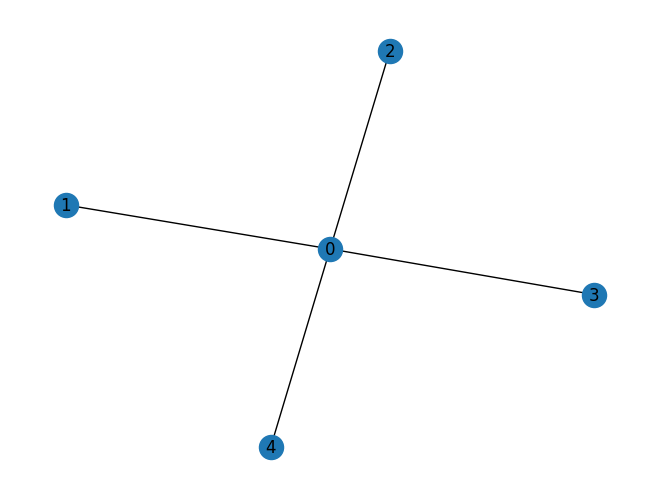

node_size 10


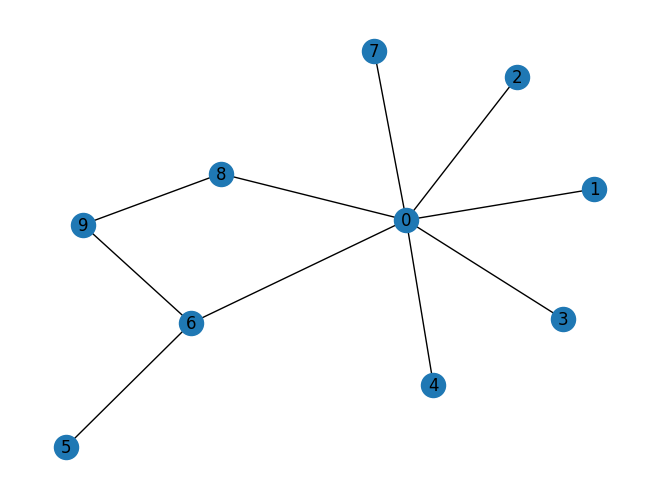

node_size 15


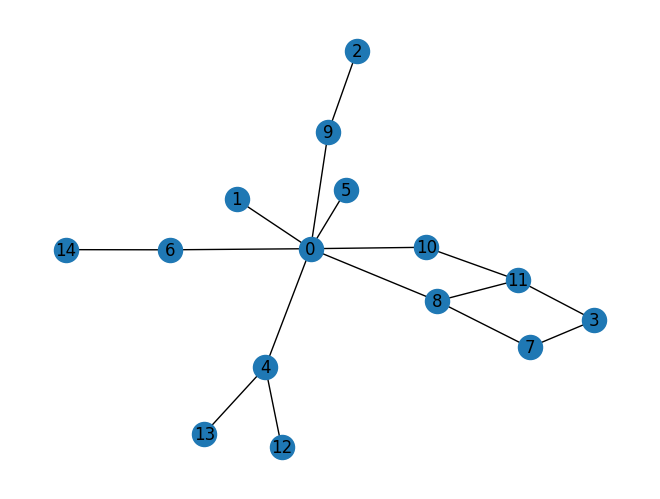

node_size 20


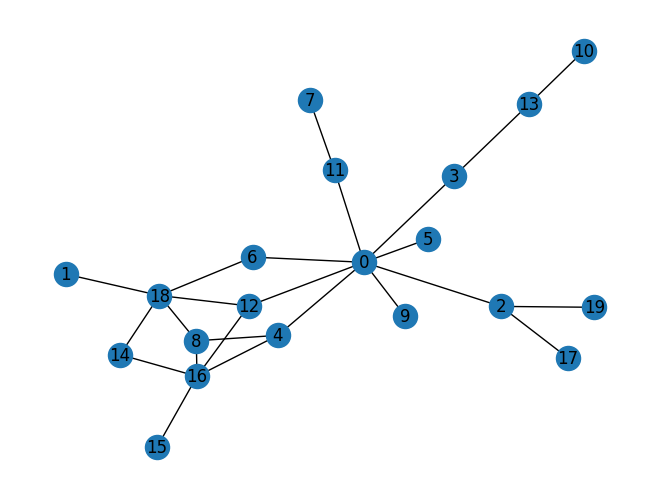

node_size 25


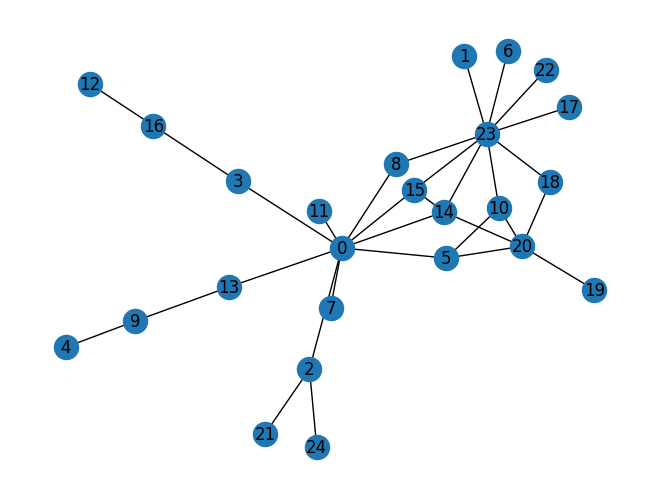

node_size 30


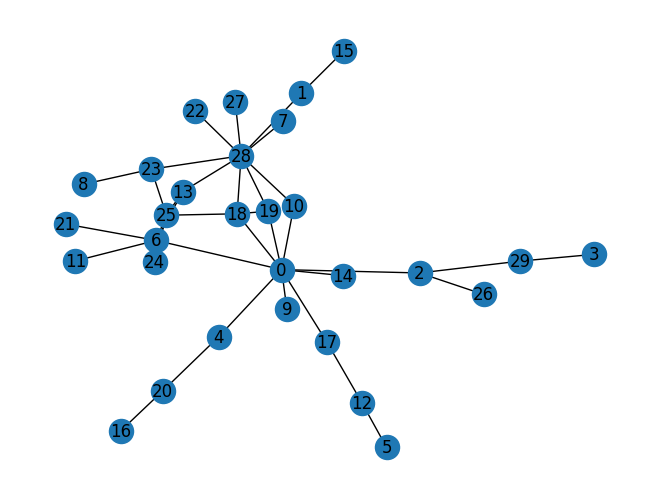

node_size 35


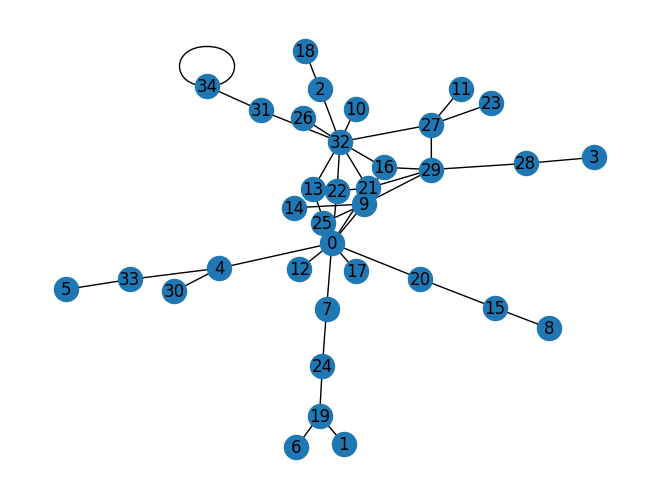

In [10]:
for g in graphs:
    print('node_size',len(g))
    nx.draw(g, with_labels = True)
    plt.show()

Plot the subgraphs 

In [11]:
# for g in graphs:
#     print(g.nodes(data=True))
#     print('new graph')  

Utility Functions

In [12]:
from torch_geometric.utils import to_dense_adj
import torch
import torch.nn.functional as F
from scipy import spatial
from scipy.special import kl_div
from sklearn import preprocessing as pre
import numpy as np
#max_nodes = 10
node_types = 4
edge_types = 1
node_classes = [0, 1, 2, 3]
device = 'cpu'
def count_parameters(model):
    """
    Counts the number of parameters for a Pytorch model
    """
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def to_one_hot(x, options):
    """
    Converts a tensor of values to a one-hot vector
    based on the entries in options.
    """
    return torch.nn.functional.one_hot(x.long(), len(options))

def kl_loss(mu=None, logstd=None):
    """
    Closed formula of the KL divergence for normal distributions
    """
    MAX_LOGSTD = 10
    logstd = logstd.clamp(max=MAX_LOGSTD)
    kl_div = -0.5 * torch.mean(torch.sum(1 + 2 * logstd - mu ** 2 - logstd.exp() ** 2, dim=1))

    # Limit numeric errors
    kl_div = kl_div.clamp(max=1000)
    return kl_div


def adj_recon_loss(adj_truth, adj_pred):
    return F.binary_cross_entropy(adj_truth, adj_pred)

def node_type_loss(truth, pred):
    return spatial.distance.cosine(truth, pred)

def rescale(x):
    x = x.reshape(-1, 1)
    x_norm = pre.MinMaxScaler().fit_transform(x)
    return x_norm

def node_feature_loss(original,sampled):
    #https://stackoverflow.com/questions/11405673/python-cosine-similarity-m-n-matrices
    A = np.array(rescale(original), dtype=object)
    B = np.array(rescale(sampled), dtype=object)

    Aflat = np.hstack(A)
    Bflat = np.hstack(B)

    return spatial.distance.cosine(Aflat, Bflat)
    #return kl_div(rescale(original),rescale(sampled))

def triu_to_dense(triu_values, num_nodes):
    """
    Converts a triangular upper part of a matrix as flat vector
    to a squared adjacency matrix with a specific size (num_nodes).
    """
    dense_adj = torch.zeros((num_nodes, num_nodes)).to(device).float()
    triu_indices = torch.triu_indices(num_nodes, num_nodes, offset=1)
    tril_indices = torch.tril_indices(num_nodes, num_nodes, offset=-1)
    dense_adj[triu_indices[0], triu_indices[1]] = triu_values
    dense_adj[tril_indices[0], tril_indices[1]] = triu_values
    return dense_adj

def get_adjacency(triu_logits,max_nodes):
    # Reshape triu predictions
    edge_matrix_shape = (int((max_nodes * (max_nodes - 1)) / 2), edge_types + 1)
    triu_preds_matrix = triu_logits.reshape(edge_matrix_shape)
    triu_preds = torch.argmax(triu_preds_matrix, dim=1)
    adjacency_matrix = triu_to_dense(triu_preds.float(), max_nodes)
    return adjacency_matrix

def get_nodetype(node_logits,max_nodes):
    node_matrix_shape = (max_nodes, node_types)
    node_preds_matrix = node_logits.reshape(node_matrix_shape)
    node_preds = torch.argmax(node_preds_matrix[:, :4], dim=1)

    # Get node classes
    node_preds_one_hot = to_one_hot(node_preds, options=node_classes)
    node_classes_dummy = torch.Tensor(node_classes).repeat(node_preds_one_hot.shape[0], 1)
    node_class = torch.masked_select(node_classes_dummy, node_preds_one_hot.bool())
    return node_class

Model

In [13]:
import torch
import torch.nn as nn
from torch.nn import Linear
from torch_geometric.nn.conv import TransformerConv
from torch_geometric.nn import Set2Set
from torch_geometric.nn import BatchNorm



node_types = 4
edge_types = 1
node_classes = [0, 1, 2, 3]
class GraphVAE(nn.Module):
    def __init__(self, feature_size, nodesize):
        super(GraphVAE, self).__init__()
        self.encoder_embedding_size = nodesize
        self.edge_dim = 1
        self.latent_embedding_size = 64
        self.num_edge_types = 1
        self.num_node_types = 4
        self.max_nodes = nodesize
        self.decoder_hidden_neurons = 512
        self.feature_size = feature_size
        # Encoder layers
        self.conv1 = TransformerConv(feature_size,
                                    self.encoder_embedding_size,
                                    heads=4,
                                    concat=False,
                                    beta=True,
                                    #edge_dim=self.edge_dim
                                     )
        self.bn1 = BatchNorm(self.encoder_embedding_size)
        self.conv2 = TransformerConv(self.encoder_embedding_size,
                                    self.encoder_embedding_size,
                                    heads=4,
                                    concat=False,
                                    beta=True,
                                    #edge_dim=self.edge_dim
                                     )
        self.bn2 = BatchNorm(self.encoder_embedding_size)
        self.conv3 = TransformerConv(self.encoder_embedding_size,
                                    self.encoder_embedding_size,
                                    heads=4,
                                    concat=False,
                                    beta=True,
                                    #edge_dim=self.edge_dim
                                     )
        self.bn3 = BatchNorm(self.encoder_embedding_size)
        self.conv4 = TransformerConv(self.encoder_embedding_size,
                                    self.encoder_embedding_size,
                                    heads=4,
                                    concat=False,
                                    beta=True,
                                    #edge_dim=self.edge_dim
                                     )

        # Pooling layers
        #pools individual node feature vectors into a global graph level vector
        #self.pooling = Set2Set(self.encoder_embedding_size, processing_steps=10)

        # Linear layer1   # Mu
        # Linear Layer2  # Log var
        self.mu_transform = Linear(self.encoder_embedding_size,
                                            self.latent_embedding_size)
        self.logvar_transform = Linear(self.encoder_embedding_size,
                                            self.latent_embedding_size)

        # Decoder layers
        # Linear 1
        # Linear 2
        #Linear Layer3 #Decode nodes
        # Linear Layer4 #Decode edges

        self.linear_1 = Linear(self.latent_embedding_size, self.decoder_hidden_neurons)
        self.linear_2 = Linear(self.decoder_hidden_neurons, self.decoder_hidden_neurons)

        # --- Atom decoding (outputs a matrix: (max_num_atoms) * (# atom_types + "none"-type))
        atom_output_dim = self.max_nodes*self.num_node_types
        self.atom_decode = Linear(self.decoder_hidden_neurons, atom_output_dim)

        # --- Edge decoding (outputs a triu tensor: (max_num_atoms*(max_num_atoms-1)/2*(#edge_types + 1) ))
        edge_output_dim = int(((self.max_nodes * (self.max_nodes - 1)) / 2) * (self.num_edge_types + 1))
        self.edge_decode = Linear(self.decoder_hidden_neurons, edge_output_dim)

        node_feature_dim = self.max_nodes*self.feature_size
        self.node_feature_decode = Linear(self.decoder_hidden_neurons, node_feature_dim)


    def encode(self, x, edge_index, batch_index):
        # GNN layers
        x = self.conv1(x, edge_index).relu()
        x = self.bn1(x)
        x = self.conv2(x, edge_index).relu()
        x = self.bn2(x)
        x = self.conv3(x, edge_index).relu()
        x = self.bn3(x)
        x = self.conv4(x, edge_index).relu()

        # Pool to global representation
        #x = self.pooling(x, batch_index)

        # Latent transform layers
        mu = self.mu_transform(x)
        logvar = self.logvar_transform(x)
        return mu, logvar

    def decode_graph(self, graph_z):
        """
        Decodes a latent vector into a continuous graph representation
        consisting of node types and edge types.
        """
        # Pass through shared layers
        z = self.linear_1(graph_z).relu()
        z = self.linear_2(z).relu()
        # Decode atom types
        atom_logits = self.atom_decode(z)
        # Decode edge types
        edge_logits = self.edge_decode(z)
        # Decode edge types
        node_feature_logits = self.node_feature_decode(z)

        return atom_logits, edge_logits, node_feature_logits

    def decode(self, z, batch_index):
        node_logits = []
        triu_logits = []
        feature_logits = []

        # Iterate over molecules in batch
        for graph_id in torch.unique(batch_index):
            # Get latent vector for this graph
            graph_z = z[graph_id]

            # Recover graph from latent vector
            atom_logits, edge_logits, node_feature_logits = self.decode_graph(graph_z)

            # Store per graph results
            node_logits.append(atom_logits)
            triu_logits.append(edge_logits)
            feature_logits.append(node_feature_logits)

        # Concatenate all outputs of the batch
        node_logits = torch.cat(node_logits)
        triu_logits = torch.cat(triu_logits)
        feature_logits = torch.cat(feature_logits)
        return triu_logits, node_logits, feature_logits

    def reparameterize(self, mu, logvar):
        if self.training:
            # Get standard deviation
            std = torch.exp(logvar)
            # Returns random numbers from a normal distribution
            eps = torch.randn_like(std)
            # Return sampled values
            return eps.mul(std).add_(mu)
        else:
            return mu

    def forward(self, x, edge_index, batch_index):
        # encode
        # Encode the molecule
        mu, logvar = self.encode(x, edge_index, batch_index)
        # sample
        # Sample latent vector (per atom)
        z = self.reparameterize(mu, logvar)
        # decode
        # Decode latent vector into original molecule
        triu_logits, node_logits, feature_logits= self.decode(z, batch_index)

        return triu_logits, node_logits, feature_logits,mu, logvar


    def sample_graph(self, nodes):
        z = torch.randn(1, self.latent_embedding_size)
        # Get model output (this could also be batched)
        dummy_batch_index = torch.Tensor([0]).int()
        triu_logits, node_logits, feature_logits= self.decode(z, dummy_batch_index)

        # Reshape triu predictions
        edge_matrix_shape = (int((nodes * (nodes - 1)) / 2), edge_types + 1)
        triu_preds_matrix = triu_logits.reshape(edge_matrix_shape)
        triu_preds = torch.argmax(triu_preds_matrix, dim=1)

        # Reshape node predictions
        node_matrix_shape = (nodes, node_types)
        node_preds_matrix = node_logits.reshape(node_matrix_shape)
        node_preds = torch.argmax(node_preds_matrix[:, :4], dim=1)

        # Get node classes
        node_preds_one_hot = to_one_hot(node_preds, options=node_classes)
        node_classes_dummy = torch.Tensor(node_classes).repeat(node_preds_one_hot.shape[0], 1)
        node_class = torch.masked_select(node_classes_dummy, node_preds_one_hot.bool())
        #print('node_types', node_class.type(torch.int64).numpy())
        #print('node feature matrix', feature_logits.reshape(nodes,200))
        # print('triu_preds',triu_preds.float())
        adjacency_matrix = triu_to_dense(triu_preds.float(), nodes)
        #print('adj', adjacency_matrix)
        return adjacency_matrix, node_class,feature_logits.reshape(self.max_nodes, self.feature_size)
        #plot_graph(adjacency_matrix.numpy(),node_class.type(torch.int64).numpy())


Data Preparation

In [14]:
import torch
import networkx as nx
import pandas as pd
import numpy as np

def remap_indices(node_list):
    val_list = [*range(0, len(node_list), 1)]
    return dict(zip(node_list,val_list))

def preprocess_edges(edgelist,node_list):
    res = [[node_list[i] for i, j in edgelist],[node_list[j] for i, j in edgelist]]
    node_from = torch.tensor(res[0])
    node_to = torch.tensor(res[1])
    edges = torch.concat((node_from,node_to)).reshape(-1,len(node_from))
    return edges

def dataset(graph):
    orig_adj = nx.adjacency_matrix(graph).todense()
    # nx.draw(new_graph, with_labels=True)
    # plt.show()

    node_data = graph.nodes(data=True)

    feature = []
    node_type = []
    node_id = []
    for key, value in node_data:
        print(value)
        node_id.append(key)
        feature.append(value['feature'])
        node_type.append(value['node_type'])

    df = pd.DataFrame()
    df["node_id"] = node_id
    df["feature"] = feature
    df["node_type"] = node_type

    df_feature = df["feature"].apply(lambda x: np.fromstring(x, dtype=float, sep=','))
    node_features = torch.tensor(df_feature).float()
    nodes_mapping = remap_indices(list(df["node_id"]))
    edges = graph.edges()
    edge_index = preprocess_edges(edges, nodes_mapping)

    return {'x': node_features,
            'node_type_orig': node_type,
            'edge_index': edge_index,
            'orig_adj': orig_adj
            }

Plot generated graphs with node types

In [15]:
def plot(G,classes):

    color_class_map = {0: 'blue', 1: 'red', 2: 'darkgreen', 3: 'orange'}

    nx.set_node_attributes(G, dict(zip(G.nodes(), classes)), 'class')

    nx.draw(G, 
        with_labels=True, node_color=[color_class_map[node[1]['class']] 
                        for node in G.nodes(data=True)], 
            #node_size=800,
        font_color='white')
    plt.show()       

In [16]:
small_graph_dict = []
def postprocess(real_adj,sync_adj,classes,node_features):
    
    node_features = node_features.detach().numpy()
    print('type', node_features.shape)
    #counter = 0
    real_G = nx.from_numpy_array(real_adj)
    list_realedges = list(real_G.edges())
    
    sync_G = nx.from_numpy_array(sync_adj)
    list_syncedges = list(sync_G.edges())
    
    new_graph =[]
    for edge in list_syncedges:
    #print(i)
        if edge in list_realedges:
            #print(edge)
            
            new_graph.append(edge)
            
    new_G = nx.from_edgelist(new_graph) 
    real_node_list = list(real_G.nodes())
    syn_node_list = list(new_G.nodes())
    #Get the nodes removed from real node list
    nodes_removed = []
    for element in real_node_list:
        if element not in syn_node_list:
            nodes_removed.append(element)
            
    index_list =[]
    for i in nodes_removed:
        index_list.append(real_node_list.index(i))
    print('index_list',index_list)
    #remove rows from the same index in class and node feature list
    if index_list:
        classes = np.delete(classes, index_list)
        node_features = np.delete(node_features, index_list, axis=0)
        print('new_type', node_features.shape)
    
    if not nx.is_empty(new_G) and nx.is_connected(new_G):
        print('node types',classes)
        print('nodes',new_G.number_of_nodes())
        print('node_features',node_features.shape)
        #print('adj',sync_adj)
        save_syn_graphs(new_G,torch.tensor(node_features),classes,new_G.number_of_nodes(),"sync"+str(random.randint(1, 1000000))+time.strftime("%H%M%S"))
        plot(new_G,classes)
        small_graph_dict.append({'graph':new_G,'classes':classes,'node_features':node_features})

In [18]:
def save_real_graphs(graph,node_feature,classes,max_num_nodes,real):
        graph_path =  "real_vae/pubmed/graphs/"
        node_feat_path = "real_vae/pubmed/node_features/"
        node_class_path = "real_vae/pubmed/node_classes/"
#         #save graph
        nx.write_gexf(graph, graph_path+real+"_G"+str(max_num_nodes)+".gexf")
        #save nodefeature
        torch.save(node_feature, node_feat_path+real+"_node_features"+str(max_num_nodes)+".pt") 
        #save node classes
        torch.save(torch.tensor(classes), node_class_path+real+"_node_class"+str(max_num_nodes)+".pt") 


In [19]:
def save_syn_graphs(graph,node_feature,classes,max_num_nodes,real):
        graph_path = "syn_vae/pubmed/"+real
        os.makedirs(graph_path)
#         graph_path = "graphs/syn/vae/pubmed/"
#         node_feat_path = "node_features/syn/vae/pubmed/"
#         node_class_path = "node_classes/syn/vae/pubmed/"
#         #save graph
        nx.write_gexf(graph, graph_path+'/'+real+"_G"+str(max_num_nodes)+".gexf")
        #save nodefeature
        torch.save(node_feature, graph_path+'/'+real+"_node_features"+str(max_num_nodes)+".pt") 
        #save node classes
        torch.save(torch.tensor(classes), graph_path+'/'+real+"_node_class"+str(max_num_nodes)+".pt") 

Train

In [ ]:
import pandas as pd
import torch
import numpy as np
import networkx as nx
from littleballoffur import ForestFireSampler
import matplotlib.pyplot as plt
import csv
import shutil
import os


node_types = 4
edge_types = 1
node_classes = [0, 1, 2, 3]
feature_size = 200
def train(type, epoch, nodesize, model, data):
    x = data['x']
    node_type_orig = data['node_type_orig']
    edge_index = data['edge_index']
    orig_adj = data['orig_adj']

    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    optimizer.zero_grad()
    # Call model
    batch_index = torch.Tensor([0]).int()
    triu_logits, node_logits, feature_logits, mu, logvar = model(x.float(),
                                                                 edge_index, batch_index)

    # Calculate loss
    # graph loss
    pred_adj = get_adjacency(triu_logits, nodesize)
    graph_loss = adj_recon_loss(torch.Tensor(orig_adj), pred_adj)

    # node type loss
    node_type_pred = get_nodetype(node_logits,nodesize)
    nodetype_loss = node_type_loss(node_type_orig, node_type_pred)

    # node feature loss
    feature_loss = node_feature_loss(x.float().detach().numpy(),
                                     feature_logits.reshape(nodesize, feature_size).detach().numpy())
    # print('feature_loss',feature_loss)

    kldiv_loss = kl_loss(mu, logvar)

    # Add node feature loss, node type loss
    loss = graph_loss + nodetype_loss + feature_loss + kldiv_loss
    print('epoch:', epoch, 'graph_loss:', graph_loss, 'nodetype_loss:', nodetype_loss, 'feature_loss', feature_loss,
          'kldiv_loss:', kldiv_loss, 'loss:', loss)
    if type == "Train":
        loss.backward()
        optimizer.step()

    # Perform sampling
    if type == "Test":
        sync_adj, sync_classes, node_features = model.sample_graph(nodesize)
        postprocess(orig_adj, sync_adj.numpy(),sync_classes.type(torch.int64).numpy(),node_features)
        

def main():


    for g in graphs:
        max_num_nodes = g.number_of_nodes()

        print('max number node: {}'.format(max_num_nodes))
        #create dataset
        data = dataset(g)
        #build model
        model = GraphVAE(feature_size=200,nodesize=max_num_nodes)
        #Plot original graph
        print('------------------Plot of Real Graph------------------------')
        orig_classes = data['node_type_orig']
        real_G = nx.from_numpy_array(data['orig_adj'])
        
#         graph_path = "vae_graphs/pubmed/"
#         node_feat_path = "vae_node_features/pubmed/"
#         node_class_path = "vae_node_classes/pubmed/"
        
        #nx.write_gexf(real_G, graph_path+"real_G"+str(max_num_nodes)+".gexf")           
        #torch.save(data['x'], node_feat_path+"real_node_features"+str(max_num_nodes)+".pt") 
        #torch.save(torch.tensor(data['node_type_orig']), node_class_path+"real_node_class"+str(max_num_nodes)+".pt") 
        save_real_graphs(real_G,data['x'],orig_classes,max_num_nodes,"real") 
        plot(real_G, orig_classes)
        print('------------------Plot of Synthetic Graphs------------------------')
        for epoch in range(2000):
            model.train()
            train(type="Train",epoch=epoch,nodesize=max_num_nodes,model=model,data=data)

            if epoch % 5 == 0:
                #print("Start test epoch...")
                model.eval()
                train(type="Test",epoch=epoch,nodesize=max_num_nodes,model=model,data=data)

if __name__ == '__main__':
    main()

create dataset for small graphs

In [ ]:
small_graph_dict

In [ ]:
len(small_graph_dict)